# Setup

In [110]:
from paths import mini_path, full_path
from nuscenes_env.nuscenes import NuScenes
from nuscenes_env.nuscenes.prediction.helper import PredictHelper

mode = 'full'

if mode == 'mini':
    dataroot = mini_path
    version = 'v1.0-mini'
elif mode == 'full':
    dataroot = full_path
    version = 'v1.0'

nusc = NuScenes(dataroot=dataroot, version=version)
helper = PredictHelper(nusc)

Loading NuScenes tables for version v1.0...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 40.2 seconds.
Reverse indexing ...
Done reverse indexing in 13.7 seconds.


# Raw

## Create

In [100]:
%load_ext autoreload
%autoreload 2

from external_libs.nuscenes_env.create_dataset.process_raw_dataset import ProcessRawDataset
import os
from configs.configs import *

cls = ProcessRawDataset(config=process_raw_data_config)
#cls.get_raw_data(scene_name='scene-0900')
cls.get_raw_data()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading NuScenes tables for version v1.0...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 40.1 seconds.
Reverse indexing ...
Done reverse indexing in 11.7 seconds.
static_layers.py - Loading Map: boston-seaport
static_layers.py - Loading Map: singapore-hollandvillage
static_layers.py - Loading Map: singapore-queenstown
static_layers.py - Loading Map: singapore-onenorth
current scene: scene-0008


2021-07-06 21:14:22,350	WARNING worker.py:678 -- OMP_NUM_THREADS=16 is set, this may impact object transfer performance.
2021-07-06 21:14:22,371	WARNING services.py:592 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2021-07-06 21:14:22,374	INFO resource_spec.py:212 -- Starting Ray with 121.48 GiB memory available for workers and up to 93.13 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2021-07-06 21:14:23,265	INFO services.py:1093 -- View the Ray dashboard at localhost:8265
2021-07-06 21:14:23,270	WARNING services.py:1380 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 72644952064 bytes available. This may slow down performance! You may be able to free up space by deleting files in /dev/shm or terminating any running plasma_store_server processes. If you are inside a Docker container, you may need to pass an argument with the flag '--shm

processing scene:   0%|          | 0/1 [00:00<?, ?it/s]
(pid=61077) scene:scene-0900
(pid=61077) current scene: scene-0900
processing scene: 100%|██████████| 1/1 [04:01<00:00, 241.79s/it]
Dataframe size: (308, 32)


## Inspect

In [176]:
import pandas as pd
import os
import numpy as np
from utils.utils import get_dataframe_summary
from configs.configs import dir_raw

%load_ext autoreload
%autoreload 2

p = os.path.join(dir_raw, 'scene-0047.pkl')
d = pd.read_pickle(p)

d_info = get_dataframe_summary(d)
print(d_info)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data shape: (185, 32)
+------------------------+-------------------------+-------------+---------------------+---------------------+----------------------+
|      Column name       |           type          |    shape    |         min         |         mean        |         max          |
+------------------------+-------------------------+-------------+---------------------+---------------------+----------------------+
|      scene_token       |      <class 'str'>      |     n/a     |         n/a         |         n/a         |         m/a          |
|   scene_description    |      <class 'str'>      |     n/a     |         n/a         |         n/a         |         m/a          |
|       scene_name       |      <class 'str'>      |     n/a     |         n/a         |         n/a         |         m/a          |
|   scene_nbr_samples    |  <class 'numpy.int64'>  |     n/a     |         n/a        

In [175]:
import pathlib
import pandas as pd

ps = [str(p) for p in pathlib.Path(dir_raw).rglob('*.pkl')]
for p in ps:
    df = pd.read_pickle(p)
    print(df.sample_idx.tolist())

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39]
[0, 0, 1, 1, 1, 1, 2, 2

# Filtered

## Create

In [157]:
%load_ext autoreload
%autoreload 2

from filters.filter_api import FilterApi
from configs.configs import filter_data_config

filter = FilterApi(filter_data_config)
#filter.run()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
724


## Inspect

In [136]:
import pandas as pd
import os
import numpy as np
from utils.utils import get_dataframe_summary
from configs.configs import p_filter

%load_ext autoreload
%autoreload 2

d = pd.read_pickle(p_filter)

d_info = get_dataframe_summary(d)
print(d_info)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data shape: (2169, 36)
+------------------------+-------------------------+---------------+---------------------+-----------------------+--------------------+
|      Column name       |           type          |     shape     |         min         |          mean         |        max         |
+------------------------+-------------------------+---------------+---------------------+-----------------------+--------------------+
|      scene_token       |      <class 'str'>      |      n/a      |         n/a         |          n/a          |        m/a         |
|   scene_description    |      <class 'str'>      |      n/a      |         n/a         |          n/a          |        m/a         |
|       scene_name       |      <class 'str'>      |      n/a      |         n/a         |          n/a          |        m/a         |
|   scene_nbr_samples    |  <class 'numpy.int64'>  |      n/a      |     

In [139]:
for i, r in d.iterrows():
    for j in r.instance_interactions:
        if 'yield' in j:
            print(i)

# Processed

## Create

In [128]:
%load_ext autoreload
%autoreload 2

from external_libs.nuscenes_env.create_dataset.process_training_data import ProcessTrainingData
import os
from configs.configs import processed_data_config

cls = ProcessTrainingData(config=processed_data_config, helper=helper)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
cls.process(num_closest_obs=6)



























  0%|          | 0/1 [00:00<?, ?it/s]

processing scene scene-0900




























100%|██████████| 1/1 [00:13<00:00, 13.41s/it]

df shape: (29, 19)


## Inspect

In [184]:
import pandas as pd
import os
import numpy as np
from utils.utils import get_dataframe_summary
from configs.configs import dir_processed

%load_ext autoreload
%autoreload 2

d = pd.read_pickle(dir_processed+"/scene-0061.pkl")

d_info = get_dataframe_summary(d)
print(d_info)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data shape: (28, 19)
+------------------+-------------------------+-----------+---------------------+---------------------+----------------------+
|   Column name    |           type          |   shape   |         min         |         mean        |         max          |
+------------------+-------------------------+-----------+---------------------+---------------------+----------------------+
|    scene_name    |      <class 'str'>      |    n/a    |         n/a         |         n/a         |         m/a          |
|   sample_token   |      <class 'str'>      |    n/a    |         n/a         |         n/a         |         m/a          |
|    sample_idx    | <class 'numpy.float64'> |    n/a    |         n/a         |         n/a         |         m/a          |
|   sample_time    | <class 'numpy.float64'> |    n/a    |         n/a         |         n/a         |         m/a          |
|    ego_

In [121]:
for i, r in d.iterrows():
    if '2f44' in r.instance_token:
        print(r.instance_vel)

AttributeError: 'Series' object has no attribute 'instance_token'

# GNN

## Create

In [130]:
%load_ext autoreload
%autoreload 2

from dataset.process_gnn_data import ProcessGnnData
import os
from configs.configs import processed_gnn_data_config

processor = ProcessGnnData(config=processed_gnn_data_config)

df = processor.process()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data shape: (29, 19)
+------------------+-------------------------+---------------+----------------------+---------------------+-----------------------+
|   Column name    |           type          |     shape     |         min          |         mean        |          max          |
+------------------+-------------------------+---------------+----------------------+---------------------+-----------------------+
|    scene_name    |      <class 'str'>      |      n/a      |         n/a          |         n/a         |          m/a          |
|   sample_token   |      <class 'str'>      |      n/a      |         n/a          |         n/a         |          m/a          |
|    sample_idx    |  <class 'numpy.int64'>  |      n/a      |         n/a          |         n/a         |          m/a          |
|   sample_time    | <class 'numpy.float64'> |      n/a      |         n/a          |         n/a  

## Inspect

In [185]:
import pandas as pd
import os
import numpy as np
from utils.utils import get_dataframe_summary
from configs.configs import p_gnn

%load_ext autoreload
%autoreload 2

d = pd.read_pickle(p_gnn)

d_info = get_dataframe_summary(d)
print(d_info)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data shape: (5253, 8)
+------------------+-----------------------------------+--------+----------------------+---------------------+----------------------+
|   Column name    |                type               | shape  |         min          |         mean        |         max          |
+------------------+-----------------------------------+--------+----------------------+---------------------+----------------------+
|    sample_idx    |      <class 'numpy.float64'>      |  n/a   |         n/a          |         n/a         |         m/a          |
|   sample_token   |           <class 'str'>           |  n/a   |         n/a          |         n/a         |         m/a          |
|    scene_name    |           <class 'str'>           |  n/a   |         n/a          |         n/a         |         m/a          |
| ego_observations |      <class 'numpy.ndarray'>      |  (6,)  |   -0.9635374376262  

In [192]:
nb_yields = 0
nb_follow = 0
nb_intersection = 0
for i, r in d.iterrows():
    for k, v in r.agent_info.items():
        for interaction in v['interactions']:
            if interaction[0] == 'yields':
                print(i)
                nb_yields += 1
            if 'follows' in interaction[0]:
                nb_follow += 1
            if 'occup' in interaction[0]:
                nb_intersection += 1
print(nb_yields)
print(nb_follow)
print(nb_intersection)

125
127
311
437
437
438
439
440
569
569
570
570
570
570
571
571
572
572
573
573
574
574
603
604
605
606
819
820
821
951
952
952
953
954
995
996
999
1027
1028
1029
1030
1031
1032
1033
1034
1100
1101
1102
1103
1272
1272
1275
1275
1276
1277
1278
1342
1342
1343
1343
1344
1344
1345
1345
1346
1346
1347
1347
1348
1348
1349
1349
1350
1457
1462
1463
1463
1464
1464
1465
1465
1471
1691
1691
1692
1692
1693
1693
1818
1818
1819
1819
1820
1820
1822
1822
1827
1829
1830
1831
1832
1833
1837
1838
1839
1840
1841
1842
1912
1913
1914
1914
1914
1915
1915
1915
1916
1916
1916
1917
1918
1986
2171
2172
2173
2174
2179
2220
2221
2223
2224
2427
2429
2430
2431
2432
2433
2434
2435
2436
2736
2737
2738
2739
2740
2805
2807
2807
2808
2808
2809
2809
2825
2826
2827
2827
2827
2828
2828
2828
2829
2830
2878
2879
2879
2880
2880
2883
2884
2885
2886
2886
3019
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3272
3279
3280
3281
3282
3367
3368
3371
3372
3405
3405
3406
3406
3407
3407
3409
3409
3412
3413
3413
3414
3414
3414
3415
34

In [191]:
print(len(d.scene_name.unique().tolist()))

219


# Facet

In [ ]:
from utils.utils import facet_display_overview, facet_display_stat
import pandas as pd

%load_ext autoreload
%autoreload 2

def create_df_facet(d):
    return d.drop([
        'sample_token',
        'sample_idx',
        'sample_time',
        'ego_observations',
        'ado_obs', 
        'discretized_lane',
        'ego_future',
        'ego_past',
        'ado_obs',
        'ado_futures',
        'ado_past',
        'instance_tokens',
        'ego_vel',
        'ado_vel'
    ], axis=1)


d_facet = create_df_facet(d)
facet_display_stat(d_facet)
#facet_display_overview(d)

# Data Scene Viz

In [132]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
from pathlib import Path
from utils.utils import get_dataframe_summary
from graphics.scene_graphics import SceneGraphics
from configs.configs import na_config

scene_graphics = SceneGraphics(config={'NuScenesAgent_config': na_config}, helper=helper)
scene_graphics.plot_list.remove('cam')

p = os.path.join(os.environ['PKG_PATH'], 'dataset', 'gnn', 'scene-0900_dataset.pkl')
d = pd.read_pickle(p)
print(f"data shape: {d.shape}")
print(get_dataframe_summary(d))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data shape: (29, 8)
data shape: (29, 8)
+------------------+-----------------------------------+---------------+----------------------+---------------------+-----------------------+
|   Column name    |                type               |     shape     |         min          |         mean        |          max          |
+------------------+-----------------------------------+---------------+----------------------+---------------------+-----------------------+
|    sample_idx    |       <class 'numpy.int64'>       |      n/a      |         n/a          |         n/a         |          m/a          |
|   sample_token   |           <class 'str'>           |      n/a      |         n/a          |         n/a         |          m/a          |
|    scene_name    |           <class 'str'>           |      n/a      |         n/a          |         n/a         |          m/a          |
| ego_observations |

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


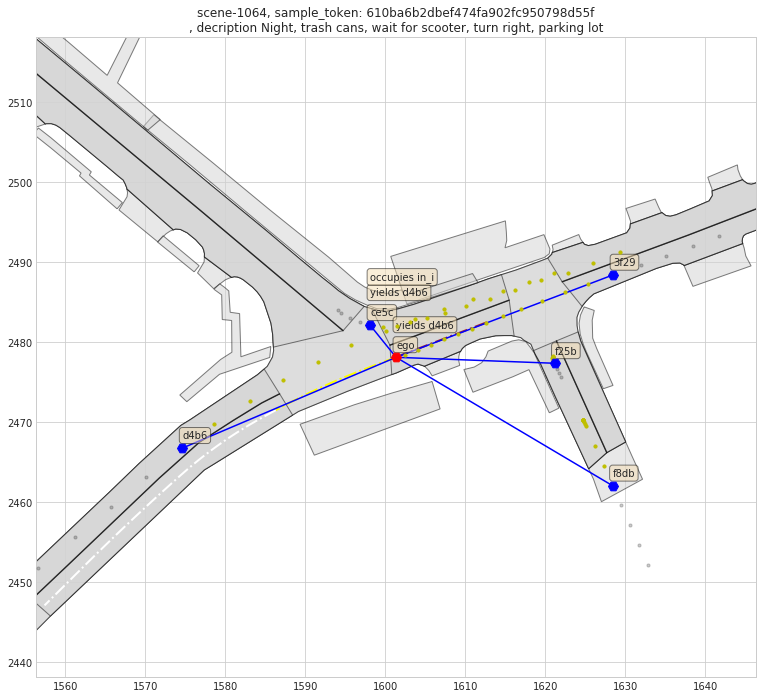

In [193]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pickle5 as cloudpickle
from utils.utils import convert_local_coords_to_global
import numpy as np
#import cloudpickle

def plot_text_box(ax, text_string:str, pos: np.ndarray, facecolor: str='wheat'):
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(pos[0], pos[1], text_string, fontsize=10, bbox=props)


def plot_scene_at_timestep(timestep):
    di = d.iloc[timestep]
    scene_name = di.scene_name
    sample_idx = di.sample_idx
    sample_token = di.sample_token
    #image_dir = os.path.join(os.environ['PKG_PATH'], 'dataset', 'raw', 'image', scene_name)

    #### generate base plot ####
#     img_pkl_list = [str(p).split('/')[-1] for p in Path(image_dir).rglob('*.pkl')]
#     image_i_pkl_path = image_dir + '/' + [p for p in img_pkl_list if sample_token in p][0]
#     fig = plt.figure(figsize=(10,10))
#     ax = cloudpickle.load(open(image_i_pkl_path, 'rb'))
#     fig._axstack.add('ax', ax)
    fig, ax = scene_graphics.plot_ego_scene(sample_token=sample_token)
    
    #### plot connecting lines to ados ####
    ego_obs_gb = di.ego_observations
    for k, v in di.agent_info.items():
        ado_obs_gb = convert_local_coords_to_global(np.array([v['current_position']]), ego_obs_gb[:2], ego_obs_gb[2:]).flatten()
        ax.plot([ego_obs_gb[0], ado_obs_gb[0]],[ego_obs_gb[1], ado_obs_gb[1]], c='b')
        # plot agent name 
        plot_text_box(ax, k, ado_obs_gb+np.array([0,1.2]))        
        # plot agent interaction
        textbox_height = 2.5
        for interaction in v['interactions']:
            if len(interaction) > 0:
                plot_text_box(ax, interaction[0]+" "+interaction[1][:4], ado_obs_gb+np.array([0,1.2+textbox_height]))
                textbox_height += 2
            
plot_scene_at_timestep(437)

In [119]:
for i, r in d.iterrows():
    if '2f44' in r.instance_token:
        print(r.instance_vel)

AttributeError: 'Series' object has no attribute 'instance_token'

# Interesting Scenes

- scene-0750
- scene-0796
- scene-0900 (ado yielding)

# Sandbox

In [78]:
from shapely.geometry import LineString, Polygon
import numpy as np

a = LineString([(0,0), (1,1.2), (3.2, 4.3)])
b = LineString([(0,0), (1.1,1.2), (3.3, 4.3)])

pa = Polygon(a)
pb = Polygon(b)

print(pa)
print(pa.intersects(pb))
i = pa.intersection(pb)
print(i)
print(a-i)

c = np.random.rand(4,2).tolist()
print(LineString(c))

s,e = a.boundary
print(s, e)
print(len(a.boundary))

POLYGON ((0 0, 1 1.2, 3.2 4.3, 0 0))
True
POLYGON ((1.971428571428574 2.568831168831173, 1 1.2, 0 0, 1.971428571428574 2.568831168831173))
LINESTRING (1.971428571428574 2.568831168831173, 3.2 4.3)
LINESTRING (0.6261828148105353 0.7292065734999871, 0.4645725420553256 0.9885796820537484, 0.9845365814179297 0.837865201026904, 0.5870172651091946 0.1114452160644407)
POINT (0 0) POINT (3.2 4.3)
2
